# STAGE 1: DATA COLLECTION
### 1A – data in English

Data acquisition concerns the collection of tweets. Each person scraps tweets (about 200k) to create a dataset for
further processing. Tweets should be about current events, such as the war, NATO etc.

1. Adding class labels: Collected data is not tagged as positive/negative/neutral.
    - a. Select the number of target classes (2 or 3 if we include neutral).
    - b. Clean data and remove stopwords
    - c. Create word embeddings for vectorized representation of words similar in meaning // OR we use
pretrained model for language of choice
    - d. Use K-MEANS to create clusters and use k=2 or k=3 depending on the number of target classes
    - e. Based on clusters tag data and manually fix clusters if necessary

It is a good idea to limit the number of words as much as possible and possibly manually tag some of them too.

2. Data cleaning: normalisation, special characters removal, punctuation, URL, emails, duplicates, lowercase
text and choose type of tokenizer. *NOTICE*: this stage is necessary BEFORE the creation of word embeddings.

In [ ]:
# Functions are implemented referencing ZUM class materials. 

In [ ]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 kB 3.1 MB/s eta 0:00:00


In [ ]:
!pip install unidecode -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 6.0 MB/s eta 0:00:00


In [ ]:
import csv
import pandas as pd
import snscrape.modules.twitter as sntwitter
from google.colab import drive

drive.mount('/content/drive')

from unidecode import unidecode

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
keyword = 'war Ukraine -is:retweet'
tweets = 0
limits = 200000
header = ['date', 'username', 'content']

with open('drive/MyDrive/ZUM/project1/tweets_en.csv', 'w') as f:
    w = csv.writer(f, quoting=csv.QUOTE_ALL)
    w.writerow(header)

    for tweet in sntwitter.TwitterSearchScraper(keyword).get_items():
      if tweets == limits:
        break
      else:
        if tweet.lang=='en':
          w.writerow([tweet.date, tweet.user.username, tweet.rawContent])
          tweets += 1

In [ ]:
df = pd.read_csv('drive/MyDrive/ZUM/project1/tweets_en.csv')
print('number of tweets:', df.shape[0])
print('\n')
print(df.head(5))

number of tweets: 200000


                        date        username  \
0  2023-03-30 16:36:33+00:00   MintPressNews   
1  2023-03-30 16:36:26+00:00        RusiAlpo   
2  2023-03-30 16:36:11+00:00  VachoudMonique   
3  2023-03-30 16:36:07+00:00  MediaResonator   
4  2023-03-30 16:36:06+00:00  TheLiberalWay1   

                                             content  
0  "There's a pivot away from just the issue, the...  
1  The UN is not able to dismiss Russia from the ...  
2  @PMSimferopol Crimea belong to Ukraine\nYou st...  
3  2/2 Kadyrov's fears of losing the dictator's f...  
4  @Makeiev I would allow individual russian athl...  


a. Select the number of target classes (2 or 3 if we include neutral).

In [ ]:
target_classes = 2

b. Clean data and remove stopwords

In [ ]:
# extract only tweets ('content' column)
import pandas as pd

tweet = df['content']
print(tweet.head(5))

0    "There's a pivot away from just the issue, the...
1    The UN is not able to dismiss Russia from the ...
2    @PMSimferopol Crimea belong to Ukraine\nYou st...
3    2/2 Kadyrov's fears of losing the dictator's f...
4    @Makeiev I would allow individual russian athl...
Name: content, dtype: object


In [ ]:
import re 
from re import sub
import nltk

from nltk import word_tokenize
#from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stopwords = nltk.corpus.stopwords.words('english')


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def clean_data(tweet):

  # convert texts into lower case
  text = tweet.lower()
  text = str(text)

  # remove URLs, ticker symbols, usernames, apostrophe, single words
  text = sub(r'https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', text)
  text = sub(r'\$[a-zA-Z0-9]*', ' ', text)
  text = sub(r'\@[a-zA-Z0-9]*', ' ', text)
  text = sub(r'\[^a-zA-Z\']', ' ', text)

  text = sub(r"[^A-Za-z0-9^,!?.\/'+]", " ", text) 
  text = sub(r'[0-9]', ' ', text)
  text = sub(r"\+", " plus ", text) 
  text = sub(r",", " ", text) 
  text = sub(r"_", " ", text) 
  text = sub(r"\.", " ", text) 
  text = sub(r"!", " ! ", text) 
  text = sub(r"\?", " ? ", text) 
  text = sub(r"'", " ", text) 
  text = sub(r"/", " ", text) 
  text = sub(r":", " : ", text) 
  text = sub(r"\s{2,}", " ", text)

  # remove short word 
  text = ' '.join([t for t in text.split() if len(t)>1])

  # Lemmatize and remove stop words
  lemma = WordNetLemmatizer()

  text = ' '.join([lemma.lemmatize(x) for x in nltk.wordpunct_tokenize(text) if x not in stopwords])
  text = [lemma.lemmatize(x, nltk.corpus.reader.wordnet.VERB) for x in nltk.wordpunct_tokenize(text) if x not in stopwords]
  return text

In [ ]:
cleaned_tweet = tweet.apply(clean_data)

In [ ]:
cleaned_tweet.head()

0    [pivot, away, issue, target, pension, critical...
1    [un, able, dismiss, russia, world, organisatio...
2    [crimea, belong, ukraine, steal, murderer, war...
3    [kadyrov, fear, lose, dictator, favor, increas...
4    [would, allow, individual, russian, athlete, p...
Name: content, dtype: object

c. Create word embeddings for vectorized representation of words similar in meaning // OR we use pretrained model for language of choice

In [ ]:
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import gensim.downloader as api

from time import time
import multiprocessing

import numpy as np

from gensim.models.phrases import Phrases, Phraser

In [ ]:
w2v_model = Word2Vec(min_count=3,
                     window=4,
                     vector_size=300,
                     sample=1e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=multiprocessing.cpu_count()-1)

start = time()

w2v_model.build_vocab(cleaned_tweet, progress_per=50000)

print('Time to build vocab: {} mins'.format(round((time() - start) / 60, 2)))

Time to build vocab: 0.02 mins


In [ ]:
start = time()

w2v_model.train(cleaned_tweet,
                total_examples=w2v_model.corpus_count,
                epochs=30,
                report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - start) / 60, 2)))

w2v_model.init_sims(replace=True)

<ipython-input-20-e0532764c9fa>:10: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


Time to train the model: 5.16 mins


In [ ]:
# save model
w2v_model.save("word2vec.model")

In [ ]:
# Detect bigrams with gensim's Phraser module.

sent = [row for row in cleaned_tweet]
phrases = Phrases(sent, min_count=1, progress_per=50000)
bigram = Phraser(phrases)
sentences = bigram[sent]
sentences[1]

['un',
 'able',
 'dismiss',
 'russia',
 'world',
 'organisation',
 'due',
 'war',
 'crime',
 'ukraine',
 'permit',
 'chair_un',
 'security_council',
 'april',
 'perhaps',
 'time',
 'rename',
 'un',
 'insecurity',
 'council']

In [ ]:
# export cleaned dataset
file_export = cleaned_tweet.copy()
file_export = file_export.apply(lambda x: ' '.join(bigram[x]))
file_export.to_csv('drive/MyDrive/ZUM/project1/cleaned_dataset.csv', index=False)

In [ ]:
cleaned_dataset = pd.read_csv(r'drive/MyDrive/ZUM/project1/cleaned_dataset.csv')
print(len(cleaned_dataset))
print(cleaned_dataset.head(10))

200000
                                             content
0  pivot_away issue target pension critical stanc...
1  un able dismiss russia world organisation due ...
2  crimea belong ukraine steal murderer war crimi...
3  kadyrov_fear lose dictator favor increase role...
4  would allow individual russian athlete_partici...
5  leader american neocon create endless war hund...
6  would nuclear war look_like ukraine russia nat...
7  even expect assault ukraine kill information w...
8  every dead ukraine pig russian orc see thousan...
9  usa west finally plan go open war russia ukrai...


In [ ]:
# check similarity of word
w2v_model.wv.most_similar(positive=['peace'])

[('negotiation', 0.680036187171936),
 ('negotiate', 0.6778013706207275),
 ('ceasefire', 0.6516430377960205),
 ('precondition', 0.6280475854873657),
 ('broker', 0.618281364440918),
 ('end', 0.6131595373153687),
 ('proposal', 0.6098649501800537),
 ('settlement', 0.5849223136901855),
 ('ceasefires', 0.5812355279922485),
 ('table', 0.5798943638801575)]

d. Use K-MEANS to create clusters and use k=2 or k=3 depending on the number of target classes

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
word_vectors = Word2Vec.load("word2vec.model").wv

model = KMeans(n_clusters=target_classes, # positive and negative
               max_iter=1000,
               random_state=42,
               n_init=50)
model.fit(X=word_vectors.vectors.astype('double'))

KMeans(max_iter=1000, n_clusters=2, n_init=50, random_state=42)

e. Based on clusters tag data and manually fix clusters if necessary

In [ ]:
# check words in each class
word_vectors.similar_by_vector(model.cluster_centers_[0], 
                               topn=10, 
                               restrict_vocab=None)

[('vegaslocalnews', 0.9613284468650818),
 ('unlv', 0.949112057685852),
 ('vegasstrong', 0.9271138906478882),
 ('makeevka', 0.9246746301651001),
 ('bhadoria', 0.9158911108970642),
 ('mmiwg', 0.9127845168113708),
 ('caveman', 0.9082187414169312),
 ('lasvegasstrip', 0.901814877986908),
 ('ook', 0.898453950881958),
 ('mone', 0.8982104063034058)]

In [ ]:
# check words in each class
word_vectors.similar_by_vector(model.cluster_centers_[1], 
                               topn=10, 
                               restrict_vocab=None)

[('ava', 0.8866299390792847),
 ('darthsoldier', 0.8811913728713989),
 ('belhumeur', 0.8803285360336304),
 ('fledgling', 0.8765844702720642),
 ('futle', 0.8765013217926025),
 ('shoo', 0.8763078451156616),
 ('timswain', 0.8762176036834717),
 ('skeletor', 0.8741839528083801),
 ('monkeyball', 0.8721122741699219),
 ('boden', 0.8719893097877502)]

In [ ]:
# assign centroids to respective sentiment labels
positive_cluster_index = 0
positive_cluster_center = model.cluster_centers_[positive_cluster_index]
negative_cluster_center = model.cluster_centers_[1-positive_cluster_index]

In [ ]:
words = pd.DataFrame(word_vectors.index_to_key)
words.columns = ['words']
words['vectors'] = words.words.apply(lambda x: word_vectors[f'{x}'])
words['cluster'] = words.vectors.apply(lambda x: model.predict([np.array(x)]))
words.cluster = words.cluster.apply(lambda x: x[0])
words['cluster_value'] = [1 if i==positive_cluster_index else -1 for i in words.cluster]
words['closeness_score'] = words.apply(lambda x: 1/(model.transform([x.vectors]).min()), axis=1)
words['sentiment_coeff'] = words.closeness_score * words.cluster_value

In [ ]:
words.head(10)

,words,vectors,cluster,cluster_value,closeness_score,sentiment_coeff
0,ukraine,"[-0.040964957, 0.032883525, -0.10102341, -0.02...",1,-1,1.032961,-1.032961
1,war,"[-0.07426121, 0.035311133, -0.07881901, -0.017...",1,-1,1.063871,-1.063871
2,russia,"[-0.07330623, -0.03840261, -0.10886296, 0.0092...",1,-1,0.996166,-0.996166
3,putin,"[-0.035635807, -0.045208797, -0.02388074, -0.0...",1,-1,0.996402,-0.996402
4,russian,"[-0.04751277, -0.03462299, -0.16872099, -0.033...",0,1,0.964404,0.964404
5,u,"[-0.028306518, -0.023131192, -0.02038911, 0.04...",1,-1,1.066403,-1.066403
6,crime,"[0.08632303, -0.058329053, -0.002822131, -0.04...",1,-1,0.977145,-0.977145
7,china,"[-0.0062410003, -0.041884724, 0.013686394, 0.0...",1,-1,0.992190,-0.992190
8,amp,"[-0.0541755, -0.0018550742, -0.014244892, -0.0...",1,-1,1.038969,-1.038969
9,say,"[-0.03552733, 0.0013447155, 0.017635351, -0.01...",1,-1,1.002764,-1.002764


In [ ]:
words[['words', 'sentiment_coeff']].to_csv('drive/MyDrive/ZUM/project1/sentiment_dictionary.csv', index=False)

In [ ]:
# labeling data

from IPython.display import display
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
final_file = pd.read_csv('drive/MyDrive/ZUM/project1/cleaned_dataset.csv')
sentiment_map = pd.read_csv('drive/MyDrive/ZUM/project1/sentiment_dictionary.csv')
sentiment_dict = dict(zip(sentiment_map.words.values, sentiment_map.sentiment_coeff.values))

In [ ]:
file_weighting = final_file.copy()
tfidf = TfidfVectorizer(tokenizer=lambda y: y.split(), norm=None)
file_weighting.content = file_weighting.content.fillna(' ')
tfidf.fit(file_weighting.content)
features = pd.Series(tfidf.get_feature_names_out())
transformed = tfidf.transform(file_weighting.content)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
def create_tfidf_dictionary(x, transformed_file, features):
    '''
    create dictionary for each input sentence x, where each word has assigned its tfidf score
    
    x - row of dataframe, containing sentences, and their indexes,
    transformed_file - all sentences transformed with TfidfVectorizer
    features - names of all words in corpus used in TfidfVectorizer

    '''
    vector_coo = transformed_file[x.name].tocoo()
    vector_coo.col = features.iloc[vector_coo.col].values
    dict_from_coo = dict(zip(vector_coo.col, vector_coo.data))
    return dict_from_coo

def replace_tfidf_words(x, transformed_file, features):
    '''
    replacing each word with it's calculated tfidf dictionary with scores of each word
    x - row of dataframe, containing sentences, and their indexes,
    transformed_file - all sentences transformed with TfidfVectorizer
    features - names of all words in corpus used in TfidfVectorizer
    '''
    dictionary = create_tfidf_dictionary(x, transformed_file, features)   
    return list(map(lambda y:dictionary[f'{y}'], x.content.split()))

In [ ]:
# %%time
replaced_tfidf_scores = file_weighting.apply(lambda x: replace_tfidf_words(x, transformed, features), axis=1)

In [ ]:
# Replacing words in sentences with their sentiment score

def replace_sentiment_words(word, sentiment_dict):
    '''
    replacing each word with its associated sentiment score from sentiment dict
    '''
    try:
        out = sentiment_dict[word]
    except KeyError:
        out = 0
    return out

In [ ]:
replaced_closeness_scores = file_weighting.content.apply(lambda x: list(map(lambda y: replace_sentiment_words(y, sentiment_dict), x.split())))

In [ ]:
# Merging both previous steps and getting the predictions:

# The dot product of such 2 sentence vectors indicates whether overall sentiment is positive or negative 
# (if the dot product is positive, the sentiment is considered positive, otherwise negative).

replacement_df = pd.DataFrame(data=[replaced_closeness_scores, replaced_tfidf_scores, file_weighting.content]).T
replacement_df.columns = ['sentiment_coeff', 'tfidf_scores', 'tweet']
replacement_df['sentiment_rate'] = replacement_df.apply(lambda x: np.array(x.loc['sentiment_coeff']) @ np.array(x.loc['tfidf_scores']), axis=1)
replacement_df['prediction'] = (replacement_df.sentiment_rate>0).astype('int8')
# replacement_df['sentiment'] = [1 if i==1 else 0 for i in replacement_df.sentiment]



In [ ]:
replacement_df.sample(10)

,sentiment_coeff,tfidf_scores,tweet,sentiment_rate,prediction
2223,"[-1.0329613355927347, -1.0638710135431957, 0]","[1.0211520305889557, 1.0210652177191488, 10.56...",ukraine war critical_moment,-2.141092,0
161083,"[0, 0, 0, 0.9644041064849967, 0, -0.9964022782...","[5.072490227856707, 5.796941201597546, 4.77531...",international_criminal court_issue arrest_warr...,-15.645478,0
842,"[-1.060629003488059, -1.0353328770820098, -0.9...","[9.217093598953399, 8.443903710719917, 2.93188...",outrageous absurd putin lose brutal illegal wa...,-63.288304,0
118992,"[-1.0329613355927347, -1.0638710135431957, 0, ...","[2.0423040611779113, 1.0210652177191488, 8.590...",ukraine war massive_drone attack black_sea fle...,-2.937471,0
171991,"[0, 0, 0, -0.9964022782982336, -1.032961335592...","[5.072490227856707, 5.796941201597546, 4.77531...",international_criminal court_issue arrest_warr...,-8.556935,0
168206,"[0.9756529698084428, 0, -1.0406282243232663, -...","[5.865242091394399, 9.377436249028579, 4.01430...",warrant actual_nazi fight ukraine though fund ...,-27.804983,0
88798,"[-1.0664029965088817, -1.0509507626262105, -1....","[3.138856900998944, 7.237370085532308, 7.41406...",u zero support afghanistan russia support regi...,-96.491603,0
12980,"[-0.9742360478298654, -0.996598992608394, -1.0...","[6.106050478888414, 6.8158369784523245, 3.1388...",map surprise u interest war russia peninsula m...,-20.694554,0
11821,"[-1.0623022086735892, -1.1276356384581998, -0....","[6.121851223419758, 4.113957904928922, 7.91277...",probably think ruzzian nazi annex ua land supp...,-103.140260,0
141699,"[-1.013327098388918, -1.1015321304116197, -1.0...","[7.830799237833509, 4.025681149914563, 4.81626...",heqing stop try force ukraine give land tell r...,-126.253485,0


In [ ]:
replacement_df.groupby(['prediction']).count()

,sentiment_coeff,tfidf_scores,tweet,sentiment_rate
prediction,,,,
0,179889,179889,179889,179889
1,20111,20111,20111,20111


In [ ]:
replacement_df = replacement_df.rename(columns={'prediction': 'label'})
labeled_data = replacement_df.copy()
labeled_data.to_csv('drive/MyDrive/ZUM/project1/labeled_dataset.csv', index=False)

In [ ]:
labeled_data.columns

Index(['sentiment_coeff', 'tfidf_scores', 'tweet', 'sentiment_rate', 'label'], dtype='object')

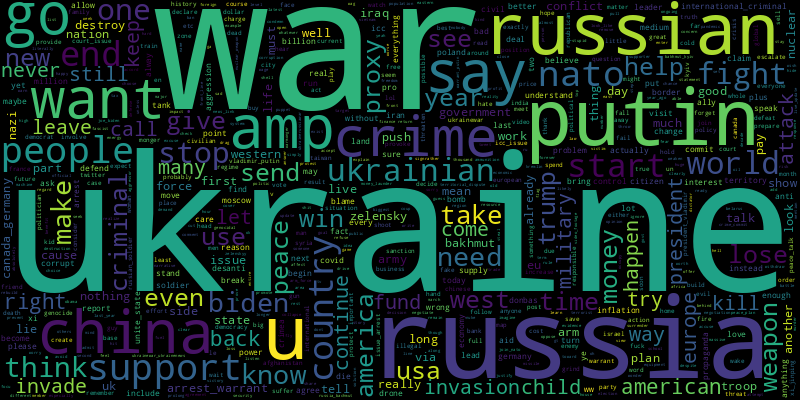

In [ ]:
# visualize words in each cluster
from wordcloud import WordCloud

positive_words = ' '.join(labeled_data[labeled_data['label']==0]['tweet'])
wc = WordCloud(max_words=1000, width=800, height=400, collocations=False).generate(positive_words)
wc.to_image()

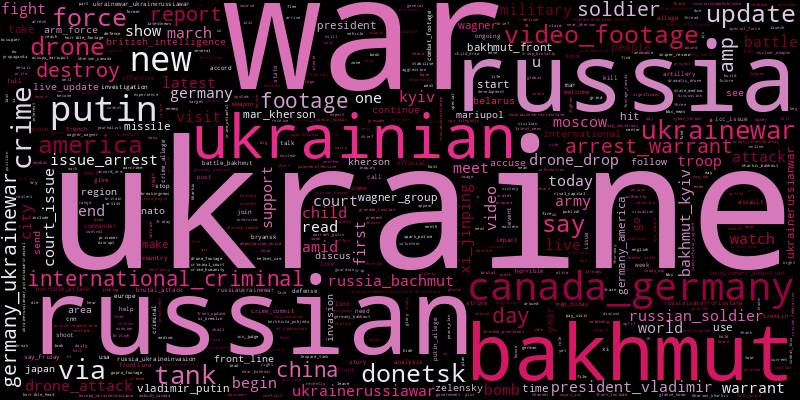

In [ ]:
# visualize words in each cluster
from wordcloud import WordCloud

negative_words = ' '.join(labeled_data[labeled_data['label']==1]['tweet'])
wc = WordCloud(max_words=1000, width=800, height=400, colormap='PuRd', collocations=False).generate(negative_words)
wc.to_image()

<Axes: xlabel='label', ylabel='count'>

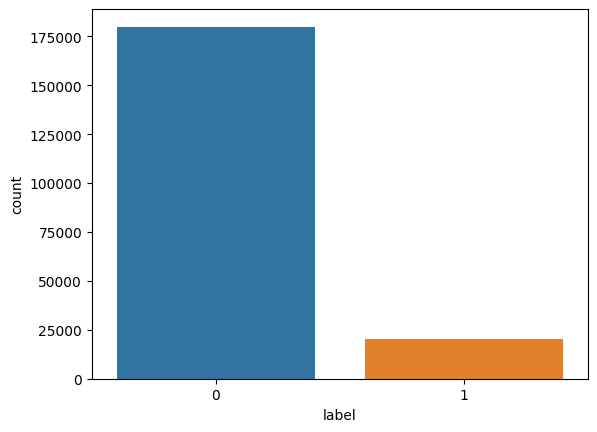

In [ ]:
# check the data distribution of each label
# plot the balance
import seaborn as sns

sns.countplot(x='label', data=labeled_data)

# ETAP 2: CLASSIC ML
Choose 3 models to fit data and present the results with confusion matric and roc curve. Just as in class. 

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATA_FILE_PATH = 'drive/MyDrive/ZUM/project1/labeled_dataset.csv'
labeled_df = pd.read_csv(DATA_FILE_PATH)
labeled_df.head()

,sentiment_coeff,tfidf_scores,tweet,sentiment_rate,label
0,"[0, -0.9887659820588204, -0.9600895128771504, ...","[11.596639733083574, 5.240184910433145, 6.3893...",pivot_away issue target pension critical stanc...,-71.259325,0
1,"[-0.9705278756179372, -1.0153483961628798, -0....","[11.712407881558674, 6.523969048067865, 8.4875...",un able dismiss russia world organisation due ...,-67.713017,0
2,"[-0.9582092068659928, -1.0096123363248222, -1....","[5.6994858654468326, 7.385994715165312, 1.0211...",crimea belong ukraine steal murderer war crimi...,-49.619457,0
3,"[0, -1.03659647085158, -1.0324134714488902, -1...","[12.107465356849564, 4.572524652985241, 6.6296...",kadyrov_fear lose dictator favor increase role...,-38.531998,0
4,"[-1.0720114685736324, -1.0493923477768476, -1....","[7.728015005727193, 5.671314988480137, 8.00207...",would allow individual russian athlete_partici...,-70.762501,0


In [ ]:
X = labeled_df.tweet
Y = labeled_df.label

In [ ]:
# train:test = 9:1
# 'stratify' preserves the proportion of target as in original dataset
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.1, 
                                                    stratify=Y, 
                                                    random_state=1)

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('Number of feature words: ', len(vectoriser.get_feature_names_out()))

Number of feature words:  500000


In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
def plot_performance(model):
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))
  
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  
  confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['positive', 'negative'])

  cm_display.plot()
  plt.show()

In [ ]:
# plot roc curve
def plot_roc_curve(modelname):
  pred_y = modelname.predict(X_test)

  fpr, tpr, thresh = metrics.roc_curve(y_test, pred_y[::,1])

  auc = metrics.auc(fpr, tpr)

  plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc)
  plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.grid()
  plt.legend()
  plt.show()

In [ ]:
# save model with Pickle
def save_model_pkl(filename, modelname):
  with open(filename, 'wb') as file:
    pickle.dump(modelname, file)

SVM (Linear SVC)

In [ ]:
# 0: positive, 1: negative 

In [ ]:
LinearSVCmodel = LinearSVC()
LinearSVCmodel.fit(X_train, y_train)

LinearSVC()

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17989
           1       0.90      0.75      0.82      2011

    accuracy                           0.97     20000
   macro avg       0.93      0.87      0.90     20000
weighted avg       0.96      0.97      0.96     20000

Mean Absolute Error: 0.034
Mean Squared Error: 0.034
Root Mean Squared Error: 0.18439088914585774


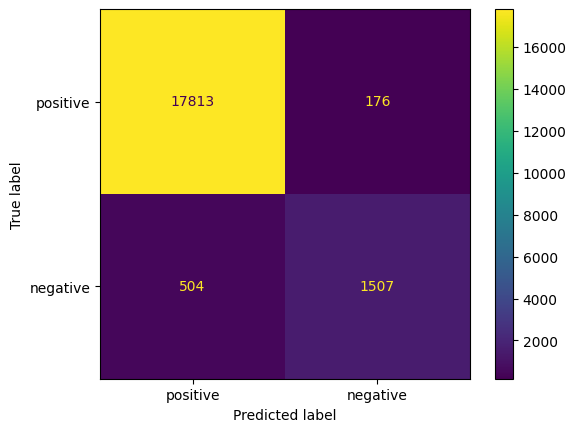

In [ ]:
plot_performance(LinearSVCmodel)

In [ ]:
# save model
save_model_pkl('drive/MyDrive/ZUM/project1/linearsvc_model.pkl', LinearSVCmodel)

Logistic Regression

In [ ]:
Logisticmodel = LogisticRegression(max_iter = 1000)
Logisticmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17989
           1       0.92      0.60      0.73      2011

    accuracy                           0.95     20000
   macro avg       0.94      0.80      0.85     20000
weighted avg       0.95      0.95      0.95     20000

Mean Absolute Error: 0.0454
Mean Squared Error: 0.0454
Root Mean Squared Error: 0.21307275752662516


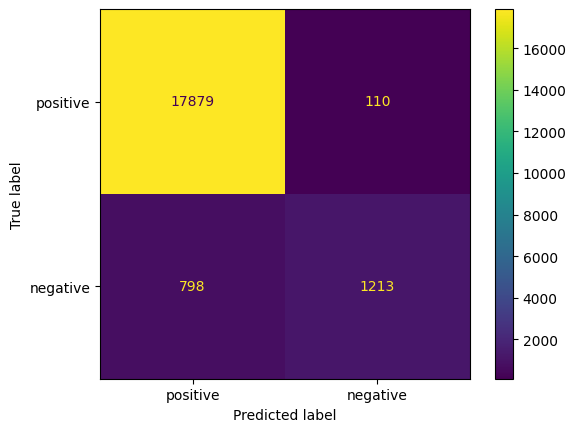

In [ ]:
plot_performance(Logisticmodel)

In [ ]:
# save model
save_model_pkl('drive/MyDrive/ZUM/project1/logi_model.pkl', Logisticmodel)

BernoulliNB Model

In [ ]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)

BernoulliNB(alpha=2)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     17989
           1       0.96      0.14      0.24      2011

    accuracy                           0.91     20000
   macro avg       0.94      0.57      0.60     20000
weighted avg       0.92      0.91      0.88     20000

Mean Absolute Error: 0.087
Mean Squared Error: 0.087
Root Mean Squared Error: 0.2949576240750525


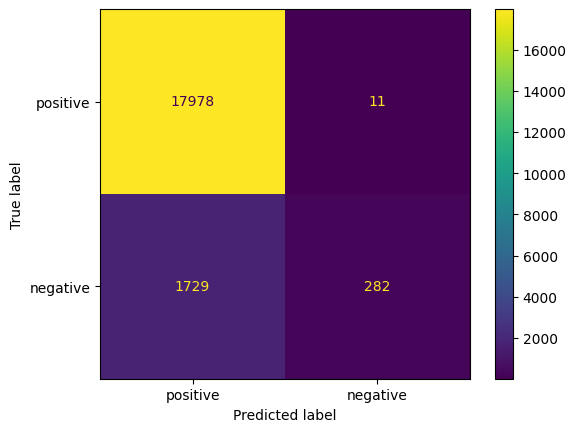

In [ ]:
plot_performance(BNBmodel)

In [ ]:
# save model
save_model_pkl('drive/MyDrive/ZUM/project1/bernoulli_model.pkl', BNBmodel)

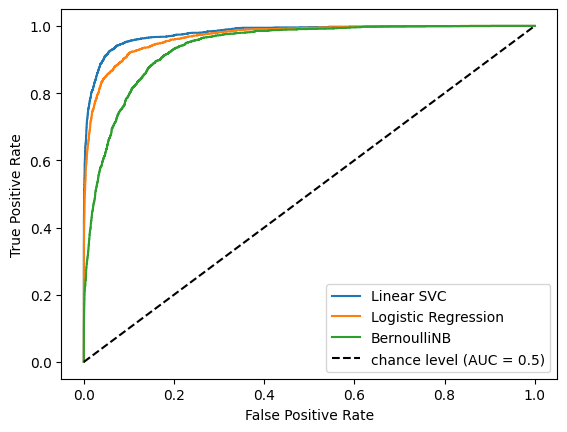

In [ ]:
# plot roc curve
# https://www.statology.org/plot-multiple-roc-curves-python/ 
y_pred_ls = LinearSVCmodel.fit(X_train, y_train)._predict_proba_lr(X_test)[:,1] 
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_ls)

y_pred_logi = Logisticmodel.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_logi)

y_pred_bnb = BNBmodel.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_bnb)

plt.plot(fpr1, tpr1, label='Linear SVC')
plt.plot(fpr2, tpr2, label='Logistic Regression')
plt.plot(fpr3, tpr3, label='BernoulliNB')
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

# ETAP 3: NEURAL MODEL
Choose type of neural network to train, and through validation decide on the best set of parameters. It is not enough
to just build a model and get results. Fine-tuning is necessary too. 

In [46]:
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DATA_FILE_PATH = 'drive/MyDrive/ZUM/project1/labeled_dataset.csv'
labeled_df = pd.read_csv(DATA_FILE_PATH)
labeled_df.head()

,sentiment_coeff,tfidf_scores,tweet,sentiment_rate,label
0,"[0, -0.9887659820588204, -0.9600895128771504, ...","[11.596639733083574, 5.240184910433145, 6.3893...",pivot_away issue target pension critical stanc...,-71.259325,0
1,"[-0.9705278756179372, -1.0153483961628798, -0....","[11.712407881558674, 6.523969048067865, 8.4875...",un able dismiss russia world organisation due ...,-67.713017,0
2,"[-0.9582092068659928, -1.0096123363248222, -1....","[5.6994858654468326, 7.385994715165312, 1.0211...",crimea belong ukraine steal murderer war crimi...,-49.619457,0
3,"[0, -1.03659647085158, -1.0324134714488902, -1...","[12.107465356849564, 4.572524652985241, 6.6296...",kadyrov_fear lose dictator favor increase role...,-38.531998,0
4,"[-1.0720114685736324, -1.0493923477768476, -1....","[7.728015005727193, 5.671314988480137, 8.00207...",would allow individual russian athlete_partici...,-70.762501,0


In [4]:
X = labeled_df.tweet
Y = labeled_df.label

In [5]:
# train:test = 9:1
# 'stratify' preserves the proportion of target as in original dataset
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.1, 
                                                    stratify=Y, 
                                                    random_state=1)

In [6]:
# train:validation = 4:1
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size=0.2, 
                                                  random_state=1) 

In [ ]:
# train:val:test = 72:18:10
print("X_train: ", X_train.shape) 
print("X_test: ", X_test.shape) 
print("X_val: ", X_val.shape) 
print("Y_train: ", y_train.shape)
print("Y_test: ", y_test.shape)
print("Y_val: ", y_val.shape)

X_train:  (144000,)
X_test:  (20000,)
X_val:  (36000,)
Y_train:  (144000,)
Y_test:  (20000,)
Y_val:  (36000,)


In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer

_tokenizer = Tokenizer()
_tokenizer.fit_on_texts(X)

X_train_converted = _tokenizer.texts_to_sequences(X_train)
X_val_converted = _tokenizer.texts_to_sequences(X_val)
X_test_converted = _tokenizer.texts_to_sequences(X_test)

In [8]:
print('X_train_converted: ')
print(X_train_converted[0])
print('X_val_converted: ')
print(X_val_converted[0])
print('X_test_converted: ')
print(X_test_converted[0])

X_train_converted: 
[3, 1330, 888, 2609, 25, 1, 1, 2, 80]
X_val_converted: 
[3847, 57860, 2932, 18226, 72, 1507, 1198, 568, 222, 153, 2331, 43, 892, 893, 1040, 573, 1225, 1, 2, 6402, 40, 1507, 4116, 942]
X_test_converted: 
[3701, 118, 3240, 157, 297, 1, 2, 60, 428, 357, 308, 1083, 2253, 3426]


In [10]:
print('X_train_converted')
print(_tokenizer.sequences_to_texts(X_train_converted)[0])
print('X_val_converted')
print(_tokenizer.sequences_to_texts(X_val_converted)[0])
print('X_test_converted')
print(_tokenizer.sequences_to_texts(X_test_converted)[0])

X_train_converted
russia roll complete garbage fight ukraine ukraine war via
X_val_converted
eric beranger ceo mbda call greater co operation european nation manufacturer weapon production reach critical mass light ukraine war underline need greater volume munition
X_test_converted
confidence eu soar poland due ukraine war even law justice party tension brussels endure


In [11]:
max_length = len(max(X, key=len)) 
max_length

363

In [12]:
from tensorflow.keras.utils import pad_sequences

X_train_padded = pad_sequences(X_train_converted, maxlen=max_length, padding='post',truncating='post')
X_val_padded = pad_sequences(X_val_converted, maxlen=max_length, padding='post',truncating='post')
X_test_padded = pad_sequences(X_test_converted, maxlen=max_length, padding='post',truncating='post')

In [ ]:
print(f'train padded shape: {X_train_padded.shape}')
print(f'validation padded shape: {X_val_padded.shape}')
print(f'test padded shape: {X_test_padded.shape}')

train padded shape: (144000, 363)
validation padded shape: (36000, 363)
test padded shape: (20000, 363)


In [13]:
print(y_train[:3])
print(y_val[:3])
print(y_test[:3])

78781     0
145401    0
48500     0
Name: label, dtype: int64
191139    0
174510    0
124005    0
Name: label, dtype: int64
183512    0
191413    0
179892    1
Name: label, dtype: int64


In [14]:
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)
y_test_encoded = to_categorical(y_test)

In [15]:
y_train_encoded[:5]
y_val_encoded[:5]
y_test_encoded[:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [16]:
word_length = len(_tokenizer.word_index) + 1

print(f'Max length: {max_length}')
print(f'Vocabulary size: {word_length}')

Max length: 363
Vocabulary size: 59070


In [27]:
# build a cnn model with fine-tuning
model_cnn = tf.keras.Sequential([
    layers.Embedding(word_length, 100, input_length=max_length),
    layers.Conv1D(filters=32, kernel_size=1, activation='relu'),
    layers.MaxPooling1D(pool_size=2, padding='same'),
    layers.Flatten(),
    layers.Dense(10, activation='relu'),
    layers.Dropout(0.07),
    layers.Dense(2, activation='softmax')
])

model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 363, 100)          5907000   
                                                                 
 conv1d_2 (Conv1D)           (None, 363, 32)           3232      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 182, 32)          0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5824)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                58250     
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                      

In [28]:
# early stopping: stop if model does not improve precision for 3 epochs
# (please change the number at the end of "val_precision_" depends on your training status)
# model checkpoint: save model when validation cost (val_loss) is the lowest
 
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_precision_2",
        patience=3, 
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True, 
    )
]

In [29]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

precision = keras.metrics.Precision()
recall = keras.metrics.Recall()

model_cnn.compile(
    optimizer = optimizer, 
    loss = "categorical_crossentropy", 
    metrics=[precision, recall]) 

In [30]:
history_cnn = model_cnn.fit(
     X_train_padded, 
     y_train_encoded,
     epochs = 10,
     callbacks=callbacks_list,
     validation_data=(X_val_padded, y_val_encoded), 
     verbose=True)

Epoch 1/10
4500/4500 [==============================] - 67s 15ms/step - loss: 0.1967 - precision_2: 0.9203 - recall_2: 0.9203 - val_loss: 0.1627 - val_precision_2: 0.9342 - val_recall_2: 0.9342
Epoch 2/10
4500/4500 [==============================] - 33s 7ms/step - loss: 0.1352 - precision_2: 0.9453 - recall_2: 0.9453 - val_loss: 0.1591 - val_precision_2: 0.9440 - val_recall_2: 0.9440
Epoch 3/10
4500/4500 [==============================] - 33s 7ms/step - loss: 0.1011 - precision_2: 0.9615 - recall_2: 0.9615 - val_loss: 0.1682 - val_precision_2: 0.9432 - val_recall_2: 0.9432
Epoch 4/10
4500/4500 [==============================] - 30s 7ms/step - loss: 0.0816 - precision_2: 0.9702 - recall_2: 0.9702 - val_loss: 0.2114 - val_precision_2: 0.9461 - val_recall_2: 0.9461


In [32]:
!pip install plot_keras_history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 24.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot_keras_history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9457 sha256=3d90b3c0e5804e8b80471ac76773f73c69f2551b467464b30d6e0f0faec6c133
  Stored in directory: /root/.cache/pip/wheels/2f/31/6c/bbc9703b7baa8bd3802a8aedd9e2f9e66941b0cf0d456ab4cc
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.50-py3-none-any.whl size=320501 sha256=cc453e60f6954df3354a9258afb710a1537149101ed60f817fc6db6bc7cb52ff
  Stored in directory: /root/.cache/pip/wheels/b7/f3/5d/748143833c99806921d4e1182c248876b83464746ef1e46f1d
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl siz

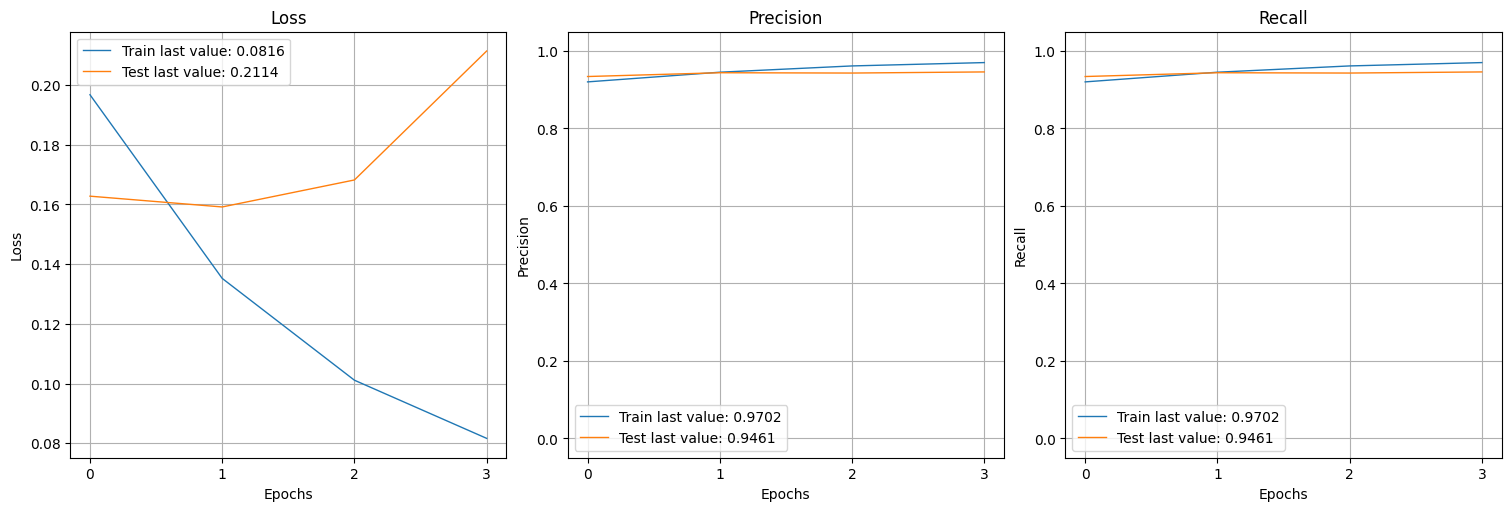

In [33]:
# plot results
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history_cnn)
plot_history(history_cnn)
plt.close()

In [34]:
# test model performance
test_loss, test_precision, test_recall = model_cnn.evaluate(X_test_padded, y_test_encoded)
print(f"Test loss: {test_loss:.3f}") 
print(f"Test precision: {test_precision:.3f}")
print(f"Test recall: {test_recall:.3f}")
test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)
print(f"Test f1 score: {test_f1:.3f}")

625/625 [==============================] - 3s 4ms/step - loss: 0.1980 - precision_2: 0.9474 - recall_2: 0.9474
Test loss: 0.198
Test precision: 0.947
Test recall: 0.947
Test f1 score: 0.947


625/625 [==============================] - 2s 3ms/step


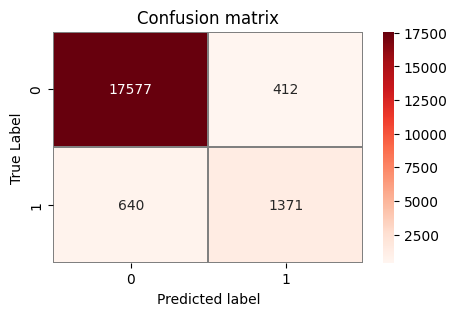

In [51]:
# plot test confusion matrix
y_pred = model_cnn.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test_encoded, axis = 1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
f,ax = plt.subplots(figsize = (5, 3))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Reds",
            linecolor = "gray", fmt = ".0f", ax=ax)
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.title("Confusion matrix")
plt.show()

In [47]:
# save model as JSON
model_cnn_json = model_cnn.to_json()
with open("drive/MyDrive/ZUM/project1/model_cnn.json", "w") as json_file:
    json_file.write(model_cnn_json)

# serialize weights to HDF5
model_cnn.save_weights("drive/MyDrive/ZUM/project1/model_cnn.h5")
print("Saved model to disk.")

Saved model to disk.


# ETAP 4: LANGUAGE MODEL
The last stage is to use selected language model, e.g. BERT, to create a sentiment analysis classifier. 

In [ ]:
# BERT Language Model

In [58]:
!pip install -U transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 97.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 104.1 MB/s eta 0:00:00


In [55]:
!pip install -U datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 21.7 MB/s eta 0:00:00


In [56]:
import pandas as pd
from datasets import Dataset
import csv 

In [59]:
import transformers
transformers.__version__

'4.29.2'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
DATA_FILE_PATH = 'drive/MyDrive/ZUM/project1/labeled_dataset.csv'
labeled_df = pd.read_csv(DATA_FILE_PATH)
labeled_df.head()

,sentiment_coeff,tfidf_scores,tweet,sentiment_rate,label
0,"[0, -0.9887659820588204, -0.9600895128771504, ...","[11.596639733083574, 5.240184910433145, 6.3893...",pivot_away issue target pension critical stanc...,-71.259325,0
1,"[-0.9705278756179372, -1.0153483961628798, -0....","[11.712407881558674, 6.523969048067865, 8.4875...",un able dismiss russia world organisation due ...,-67.713017,0
2,"[-0.9582092068659928, -1.0096123363248222, -1....","[5.6994858654468326, 7.385994715165312, 1.0211...",crimea belong ukraine steal murderer war crimi...,-49.619457,0
3,"[0, -1.03659647085158, -1.0324134714488902, -1...","[12.107465356849564, 4.572524652985241, 6.6296...",kadyrov_fear lose dictator favor increase role...,-38.531998,0
4,"[-1.0720114685736324, -1.0493923477768476, -1....","[7.728015005727193, 5.671314988480137, 8.00207...",would allow individual russian athlete_partici...,-70.762501,0


In [61]:
header = ["tweet", "label"]
temp_ds = pd.DataFrame(data=labeled_df, columns=header)
temp_ds.sample(5)

,tweet,label
147351,fight proxy war neocon america bad_idea ukrain...,0
152358,bet love cost_live war ukraine possibility war...,0
199519,acknowledge_possibility government amp leader ...,0
133724,yes cover treat uyghur_genocide serious ukrain...,0
1429,unicef_spilno child spot refuge ukrainechildre...,1


In [62]:
dataset_ = Dataset.from_pandas(temp_ds)
dataset = dataset_.train_test_split(0.2)

In [ ]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['tweet', 'label'],
        num_rows: 160000
    })
    test: Dataset({
        features: ['tweet', 'label'],
        num_rows: 40000
    })
})


In [ ]:
dataset['train']

Dataset({
    features: ['tweet', 'label'],
    num_rows: 160000
})

In [63]:
from transformers import AutoTokenizer

model_checkpoint = 'distilbert-base-uncased'
batch_size = 128

In [64]:
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

In [65]:
tokenizer('Today is Friday.')

{'input_ids': [101, 2651, 2003, 5958, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [ ]:
def process(x):
  return tokenizer(x['tweet'])

train_ds = dataset['train'].map(process)
test_ds = dataset['test'].map(process)

Map:   0%|          | 0/160000 [00:00<?, ? examples/s]

Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

In [ ]:
train_ds

Dataset({
    features: ['tweet', 'label', 'input_ids', 'attention_mask'],
    num_rows: 160000
})

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

num_labels = 2
lang_model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'pre_classifi

In [ ]:
!pip install --upgrade accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 18.2 MB/s eta 0:00:00


In [ ]:
# NameError: name 'PartialState' is not defined in TrainingArguments
!pip uninstall -y transformers accelerate
!pip install transformers accelerate

Found existing installation: transformers 4.29.2
Uninstalling transformers-4.29.2:
  Successfully uninstalled transformers-4.29.2
Found existing installation: accelerate 0.19.0
Uninstalling accelerate-0.19.0:
  Successfully uninstalled accelerate-0.19.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached transformers-4.29.2-py3-none-any.whl (7.1 MB)
  Using cached accelerate-0.19.0-py3-none-any.whl (219 kB)


In [ ]:
args = TrainingArguments(
    f'{model_checkpoint}_sentiment_analysis',
    evaluation_strategy = 'epoch',
    save_strategy = 'epoch',
    learning_rate = 2e-5,
    per_device_train_batch_size = batch_size,
    per_device_eval_batch_size = batch_size,
    num_train_epochs = 3,
    weight_decay = 0.01,
    load_best_model_at_end = True,
    metric_for_best_model = 'loss'
)

In [ ]:
from datasets import load_metric
import numpy as np

metric = load_metric('f1', 'precision')

def compute_metrics(eval_preds):
  logits, labels = eval_preds
  predictions = np.argmax(logits, axis=-1)
  return metric.compute(predictions=predictions, references=labels)

In [ ]:
trainer = Trainer(
    lang_model,
    args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.evaluate([train_ds[0]])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


{'eval_loss': 1.728519782773219e-05,
 'eval_f1': 0.0,
 'eval_runtime': 0.0305,
 'eval_samples_per_second': 32.782,
 'eval_steps_per_second': 32.782}

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1
1,0.004600,0.172010,0.831079
2,0.016800,0.144690,0.842269
3,0.012500,0.142050,0.851124


TrainOutput(global_step=3750, training_loss=0.01020011666615804, metrics={'train_runtime': 2138.1113, 'train_samples_per_second': 224.497, 'train_steps_per_second': 1.754, 'total_flos': 6625191359531520.0, 'train_loss': 0.01020011666615804, 'epoch': 3.0})

In [ ]:
# evaluate the trained model with test dataset
trainer.evaluate(test_ds)

{'eval_loss': 0.14204970002174377,
 'eval_f1': 0.8511239563262685,
 'eval_runtime': 58.5587,
 'eval_samples_per_second': 683.076,
 'eval_steps_per_second': 5.345,
 'epoch': 3.0}

In [53]:
import pickle

# save the model to disk
trained_model = trainer.model
filename = 'drive/MyDrive/ZUM/project1/lang_model.sav'
pickle.dump(trained_model, open(filename, 'wb'))

In [69]:
#Load the model
loaded_model = pickle.load(open(filename, 'rb'))

In [100]:
import torch

def txt_sentiment_classifier(txt):
  device = 'cuda' if torch.cuda.is_available() else 'cpu'
  inputs = tokenizer(txt, return_tensors='pt')
  input_ids = inputs['input_ids'].to(device)
  attention_mask = inputs['attention_mask'].to(device)
  with torch.no_grad():
    output = loaded_model(input_ids=input_ids, attention_mask=attention_mask)
    logits = output.logits
    predictions = torch.argmax(logits, dim=-1)
  if predictions.item() == 0:
    print(txt, '\n-> negative\n')
  else:
    print(txt, '\n-> positive\n')

In [101]:
txt_list = [
  'I strongly disagree with the war. Everyone deserves peace.',
  'Ukrain has all the support, we gonna win',
  ' :( My heart is totally broken...'
]

In [102]:
for txt in txt_list:
  txt_sentiment_classifier(txt)

I strongly disagree with the war. Everyone deserves peace. 
-> negative

Ukrain has all the support, we gonna win 
-> negative

 :( My heart is totally broken... 
-> negative

